In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score

In [2]:
df = pd.read_csv('fao_data_production_indices_data.csv', encoding = 'ISO-8859-1')
print(df.head())

  country_or_area element_code                               element    year  \
0     Afghanistan          152  Gross Production 1999-2001 (1000 I$)  2007.0   
1     Afghanistan          152  Gross Production 1999-2001 (1000 I$)  2006.0   
2     Afghanistan          152  Gross Production 1999-2001 (1000 I$)  2005.0   
3     Afghanistan          152  Gross Production 1999-2001 (1000 I$)  2004.0   
4     Afghanistan          152  Gross Production 1999-2001 (1000 I$)  2003.0   

          unit      value value_footnotes         category  
0  1000 Int. $  2486910.0              A   agriculture_pin  
1  1000 Int. $  2278516.0              A   agriculture_pin  
2  1000 Int. $  2524097.0              A   agriculture_pin  
3  1000 Int. $  2226346.0              A   agriculture_pin  
4  1000 Int. $  2289434.0              A   agriculture_pin  


In [3]:
df.drop(columns = ['element_code', 'value_footnotes'], inplace = True)
print(df.head())

  country_or_area                               element    year         unit  \
0     Afghanistan  Gross Production 1999-2001 (1000 I$)  2007.0  1000 Int. $   
1     Afghanistan  Gross Production 1999-2001 (1000 I$)  2006.0  1000 Int. $   
2     Afghanistan  Gross Production 1999-2001 (1000 I$)  2005.0  1000 Int. $   
3     Afghanistan  Gross Production 1999-2001 (1000 I$)  2004.0  1000 Int. $   
4     Afghanistan  Gross Production 1999-2001 (1000 I$)  2003.0  1000 Int. $   

       value         category  
0  2486910.0  agriculture_pin  
1  2278516.0  agriculture_pin  
2  2524097.0  agriculture_pin  
3  2226346.0  agriculture_pin  
4  2289434.0  agriculture_pin  


In [4]:
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)
df[['value', 'year']] = df[['value', 'year']].astype("int")
df[['year']] = df[['year']].astype('object')

In [5]:
print(df.dtypes)
print(df.shape)

country_or_area    object
element            object
year               object
unit               object
value               int32
category           object
dtype: object
(311624, 6)


In [6]:
gross_agri = df.loc[(df['element'] == 'Net Production 1999-2001 (1000 I$)') & (df['category'] == 'agriculture_pin')]
print(gross_agri.head())
gross_agri = gross_agri[['country_or_area', 'year', 'value']]
print(gross_agri.head())
print(gross_agri.dtypes)

   country_or_area                             element  year         unit  \
47     Afghanistan  Net Production 1999-2001 (1000 I$)  2007  1000 Int. $   
48     Afghanistan  Net Production 1999-2001 (1000 I$)  2006  1000 Int. $   
49     Afghanistan  Net Production 1999-2001 (1000 I$)  2005  1000 Int. $   
50     Afghanistan  Net Production 1999-2001 (1000 I$)  2004  1000 Int. $   
51     Afghanistan  Net Production 1999-2001 (1000 I$)  2003  1000 Int. $   

      value         category  
47  2423732  agriculture_pin  
48  2211684  agriculture_pin  
49  2460577  agriculture_pin  
50  2161351  agriculture_pin  
51  2237415  agriculture_pin  
   country_or_area  year    value
47     Afghanistan  2007  2423732
48     Afghanistan  2006  2211684
49     Afghanistan  2005  2460577
50     Afghanistan  2004  2161351
51     Afghanistan  2003  2237415
country_or_area    object
year               object
value               int32
dtype: object


In [7]:
tmp = gross_agri.pivot(index='country_or_area', columns='year', values='value')
tmp.head()

year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country_or_area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1287344.0,1315656.0,1320600.0,1410005.0,1471707.0,1501200.0,1641127.0,1713489.0,1750696.0,1581688.0,...,2318695.0,2295244.0,1895903.0,1820894.0,2154386.0,2237415.0,2161351.0,2460577.0,2211684.0,2423732.0
Africa +,38253410.0,40339540.0,41730180.0,42614230.0,43533390.0,43249470.0,46115900.0,47223920.0,49303410.0,51033750.0,...,99178710.0,102753300.0,103807500.0,106369800.0,109846000.0,115145100.0,118562400.0,122265800.0,127174400.0,122592600.0
Albania,236796.0,257509.0,255864.0,282273.0,268263.0,300656.0,310830.0,307678.0,317712.0,335179.0,...,636924.0,627128.0,654198.0,667970.0,671326.0,704660.0,731776.0,724522.0,765567.0,739571.0
Algeria,1597954.0,1695854.0,1700122.0,1505583.0,1748946.0,1162710.0,1295505.0,1673820.0,1550898.0,1608941.0,...,2826215.0,2886313.0,2742328.0,2977469.0,3011956.0,3596014.0,3907157.0,3930459.0,4093636.0,3895351.0
American Samoa,1673.0,1708.0,1923.0,1925.0,1979.0,2026.0,1861.0,1790.0,1835.0,1783.0,...,2021.0,1618.0,1694.0,1846.0,1907.0,2187.0,2094.0,2094.0,2193.0,2204.0


In [8]:
tmp.columns = tmp.columns.astype(str)
years = list(map(str, range(1961, 2008)))
gap = tmp
gap['Total'] = gap.sum(axis=1)
gap.sort_values(['Total'], ascending=False, axis=0, inplace=True)
gap = gap[years].transpose()
gap.fillna(0, inplace=True)
gap.head()

country_or_area,World +,Asia +,Europe +,Americas +,Eastern Asia +,European Union +,China,Southern Asia +,Northern America +,United States of America,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
year,,,,,,,,,,,,,,,,,,,,,
1961,532818000.0,165304600.0,185347700.0,131850100.0,65603110.0,112728400.0,51322380.0,64755160.0,82380580.0,75534530.0,...,182.0,481.0,0.0,422.0,717.0,472.0,183.0,169.0,0.0,0.0
1962,550251500.0,170027500.0,190568900.0,136094900.0,67813950.0,117811700.0,53069820.0,64896540.0,84606170.0,76359610.0,...,158.0,555.0,0.0,504.0,708.0,473.0,184.0,220.0,0.0,0.0
1963,563788200.0,175612000.0,190715900.0,142133800.0,70615620.0,119690000.0,55390880.0,67055720.0,89060420.0,80079850.0,...,222.0,703.0,0.0,457.0,598.0,475.0,184.0,111.0,0.0,0.0
1964,583729000.0,182721400.0,200417400.0,143615500.0,75256660.0,120998600.0,59232200.0,68346370.0,89486250.0,80953640.0,...,221.0,839.0,0.0,664.0,403.0,512.0,190.0,280.0,0.0,0.0
1965,590634700.0,186941700.0,197349200.0,148788100.0,81392060.0,122776600.0,65077270.0,66433970.0,91651830.0,82344950.0,...,205.0,745.0,0.0,545.0,409.0,513.0,212.0,255.0,0.0,0.0


In [9]:
gap.drop([col for col in gap.columns  if '+' in col], axis = 1, inplace = True)
gap.drop(['USSR'], axis = 1, inplace = True) 
gap.head(10)

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
year,,,,,,,,,,,,,,,,,,,,,
1961,51322380.0,75534530.0,47561090.0,14670390.0,21062340.0,16627270.0,16741750.0,11243460.0,7223616.0,8830862.0,...,182.0,481.0,0.0,422.0,717.0,472.0,183.0,169.0,0.0,0.0
1962,53069820.0,76359610.0,47450150.0,15232520.0,24079150.0,18097530.0,17357610.0,11930300.0,7892118.0,9097221.0,...,158.0,555.0,0.0,504.0,708.0,473.0,184.0,220.0,0.0,0.0
1963,55390880.0,80079850.0,48737990.0,15123640.0,22473430.0,19183110.0,16827850.0,13145080.0,7489278.0,9509282.0,...,222.0,703.0,0.0,457.0,598.0,475.0,184.0,111.0,0.0,0.0
1964,59232200.0,80953640.0,49710390.0,15339940.0,22770440.0,18665280.0,17867420.0,12334550.0,7906814.0,9596624.0,...,221.0,839.0,0.0,664.0,403.0,512.0,190.0,280.0,0.0,0.0
1965,65077270.0,82344950.0,46963080.0,17943190.0,24223740.0,17895080.0,18462320.0,11640160.0,7746539.0,9473031.0,...,205.0,745.0,0.0,545.0,409.0,513.0,212.0,255.0,0.0,0.0
1966,69544760.0,82075340.0,46948100.0,16749790.0,22835090.0,19074390.0,19026120.0,12650480.0,8045584.0,10284380.0,...,1358.0,709.0,0.0,763.0,543.0,514.0,212.0,204.0,200.0,0.0
1967,70601220.0,85938250.0,50260570.0,18074970.0,24543130.0,20972090.0,20223700.0,13847560.0,7670340.0,10567690.0,...,1305.0,697.0,0.0,717.0,414.0,466.0,217.0,183.0,202.0,0.0
1968,70387620.0,87156360.0,52384870.0,18408750.0,25667490.0,21069590.0,19360580.0,12927180.0,8885065.0,10984290.0,...,1311.0,728.0,0.0,314.0,457.0,437.0,218.0,197.0,202.0,0.0
1969,71060250.0,87138820.0,54238050.0,19179960.0,24204460.0,20285270.0,20222240.0,14002880.0,8950204.0,10814240.0,...,1242.0,701.0,0.0,528.0,371.0,399.0,232.0,197.0,206.0,0.0


In [10]:
gap_top10 = gap.transpose()
gap_top10 = gap_top10.head(10)
gap = gap_top10.transpose()
gap

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
year,,,,,,,,,,
1961,51322380.0,75534530.0,47561090.0,14670390.0,21062340.0,16627270.0,16741750.0,11243460.0,7223616.0,8830862.0
1962,53069820.0,76359610.0,47450150.0,15232520.0,24079150.0,18097530.0,17357610.0,11930300.0,7892118.0,9097221.0
1963,55390880.0,80079850.0,48737990.0,15123640.0,22473430.0,19183110.0,16827850.0,13145080.0,7489278.0,9509282.0
1964,59232200.0,80953640.0,49710390.0,15339940.0,22770440.0,18665280.0,17867420.0,12334550.0,7906814.0,9596624.0
1965,65077270.0,82344950.0,46963080.0,17943190.0,24223740.0,17895080.0,18462320.0,11640160.0,7746539.0,9473031.0
1966,69544760.0,82075340.0,46948100.0,16749790.0,22835090.0,19074390.0,19026120.0,12650480.0,8045584.0,10284380.0
1967,70601220.0,85938250.0,50260570.0,18074970.0,24543130.0,20972090.0,20223700.0,13847560.0,7670340.0,10567690.0
1968,70387620.0,87156360.0,52384870.0,18408750.0,25667490.0,21069590.0,19360580.0,12927180.0,8885065.0,10984290.0
1969,71060250.0,87138820.0,54238050.0,19179960.0,24204460.0,20285270.0,20222240.0,14002880.0,8950204.0,10814240.0


In [11]:
gap_top10 = gap.reset_index()
gap_top10

country_or_area,year,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
0,1961,51322380.0,75534530.0,47561090.0,14670390.0,21062340.0,16627270.0,16741750.0,11243460.0,7223616.0,8830862.0
1,1962,53069820.0,76359610.0,47450150.0,15232520.0,24079150.0,18097530.0,17357610.0,11930300.0,7892118.0,9097221.0
2,1963,55390880.0,80079850.0,48737990.0,15123640.0,22473430.0,19183110.0,16827850.0,13145080.0,7489278.0,9509282.0
3,1964,59232200.0,80953640.0,49710390.0,15339940.0,22770440.0,18665280.0,17867420.0,12334550.0,7906814.0,9596624.0
4,1965,65077270.0,82344950.0,46963080.0,17943190.0,24223740.0,17895080.0,18462320.0,11640160.0,7746539.0,9473031.0
5,1966,69544760.0,82075340.0,46948100.0,16749790.0,22835090.0,19074390.0,19026120.0,12650480.0,8045584.0,10284380.0
6,1967,70601220.0,85938250.0,50260570.0,18074970.0,24543130.0,20972090.0,20223700.0,13847560.0,7670340.0,10567690.0
7,1968,70387620.0,87156360.0,52384870.0,18408750.0,25667490.0,21069590.0,19360580.0,12927180.0,8885065.0,10984290.0
8,1969,71060250.0,87138820.0,54238050.0,19179960.0,24204460.0,20285270.0,20222240.0,14002880.0,8950204.0,10814240.0
9,1970,73892070.0,85982390.0,57130130.0,19776150.0,25999880.0,21396650.0,20226910.0,13755950.0,9485587.0,11367390.0


# Plotting trends

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

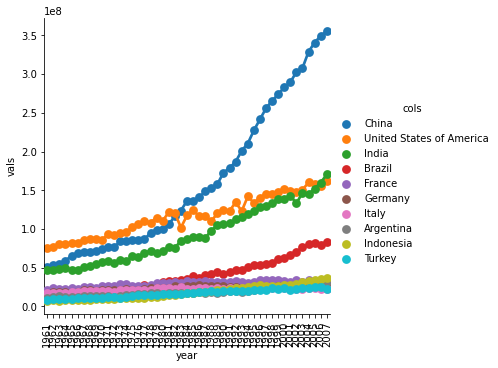

In [12]:
%matplotlib inline
plotting = gap_top10.melt('year', var_name='cols',  value_name='vals')
plt.figure(figsize=(16, 6))
ax= sns.factorplot(x="year", y="vals", hue='cols', data=plotting)
ax.set_xticklabels(rotation=90)

#plt.figure(figsize=(100,100)) # this creates a figure 8 inch wide, 4 inch high
#sns.factorplot(x="year", y="vals", hue='cols', data=plotting)
#plt.show()

Select the country: India


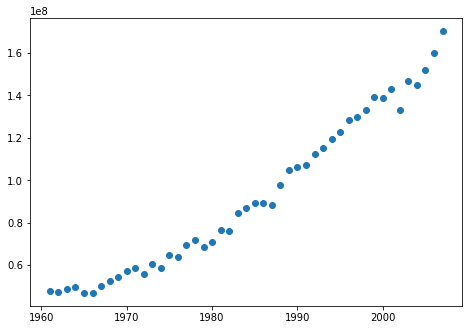

In [13]:
x=input('Select the country: ')
df_plot = gross_agri.loc[(gross_agri['country_or_area']==x)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.year,df_plot.value)

In [15]:
pred_indx = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
preds = pd.DataFrame(index = pred_indx, columns = gap.columns[0:10])
pred_indx = pd.DataFrame(pred_indx)
#print(pred_indx)
print(preds)
cols=list(gap_top10.columns)[1:]
print(cols)
preds.shape

country_or_area China United States of America India Brazil France Germany  \
2008              NaN                      NaN   NaN    NaN    NaN     NaN   
2009              NaN                      NaN   NaN    NaN    NaN     NaN   
2010              NaN                      NaN   NaN    NaN    NaN     NaN   
2011              NaN                      NaN   NaN    NaN    NaN     NaN   
2012              NaN                      NaN   NaN    NaN    NaN     NaN   
2013              NaN                      NaN   NaN    NaN    NaN     NaN   
2014              NaN                      NaN   NaN    NaN    NaN     NaN   
2015              NaN                      NaN   NaN    NaN    NaN     NaN   
2016              NaN                      NaN   NaN    NaN    NaN     NaN   
2017              NaN                      NaN   NaN    NaN    NaN     NaN   
2018              NaN                      NaN   NaN    NaN    NaN     NaN   
2019              NaN                      NaN   NaN    NaN    N

(13, 10)

# Linear regression

In [16]:
r_net_t=0
r_net=0
for col in cols:
    X=gap_top10[['year']]
    y=gap_top10[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=lm.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred))
linear_train=r_net_t/10
linear_test=r_net/10
print('Average train:', r_net_t/10)    
print('Average test:', r_net/10)

Average train: 0.8635324827325892
Average test: 0.8804776598734065


In [17]:
for col in cols:
    lm = LinearRegression()
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    lm.fit(X, Y)
    pred1 = lm.predict(pred_indx)
    #print(pred1)
    pred = pred1[0: 13]
    preds[col] = pred
preds

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
2008,3.187916e+08,1.614181e+08,1.559145e+08,7.479816e+07,3.513969e+07,2.755740e+07,2.496618e+07,2.763538e+07,3.341772e+07,2.572343e+07
2009,3.254230e+08,1.632723e+08,1.585626e+08,7.625768e+07,3.537920e+07,2.772260e+07,2.509324e+07,2.801260e+07,3.405133e+07,2.609000e+07
2010,3.320543e+08,1.651265e+08,1.612107e+08,7.771719e+07,3.561871e+07,2.788781e+07,2.522029e+07,2.838982e+07,3.468495e+07,2.645657e+07
2011,3.386857e+08,1.669808e+08,1.638588e+08,7.917671e+07,3.585822e+07,2.805302e+07,2.534735e+07,2.876704e+07,3.531856e+07,2.682314e+07
2012,3.453171e+08,1.688350e+08,1.665069e+08,8.063623e+07,3.609773e+07,2.821823e+07,2.547441e+07,2.914426e+07,3.595217e+07,2.718971e+07
2013,3.519485e+08,1.706892e+08,1.691550e+08,8.209575e+07,3.633724e+07,2.838343e+07,2.560146e+07,2.952147e+07,3.658578e+07,2.755628e+07
2014,3.585799e+08,1.725434e+08,1.718031e+08,8.355526e+07,3.657675e+07,2.854864e+07,2.572852e+07,2.989869e+07,3.721939e+07,2.792285e+07
2015,3.652113e+08,1.743977e+08,1.744512e+08,8.501478e+07,3.681626e+07,2.871385e+07,2.585557e+07,3.027591e+07,3.785301e+07,2.828942e+07
2016,3.718427e+08,1.762519e+08,1.770992e+08,8.647430e+07,3.705577e+07,2.887905e+07,2.598263e+07,3.065313e+07,3.848662e+07,2.865599e+07
2017,3.784741e+08,1.781061e+08,1.797473e+08,8.793382e+07,3.729528e+07,2.904426e+07,2.610969e+07,3.103035e+07,3.912023e+07,2.902256e+07


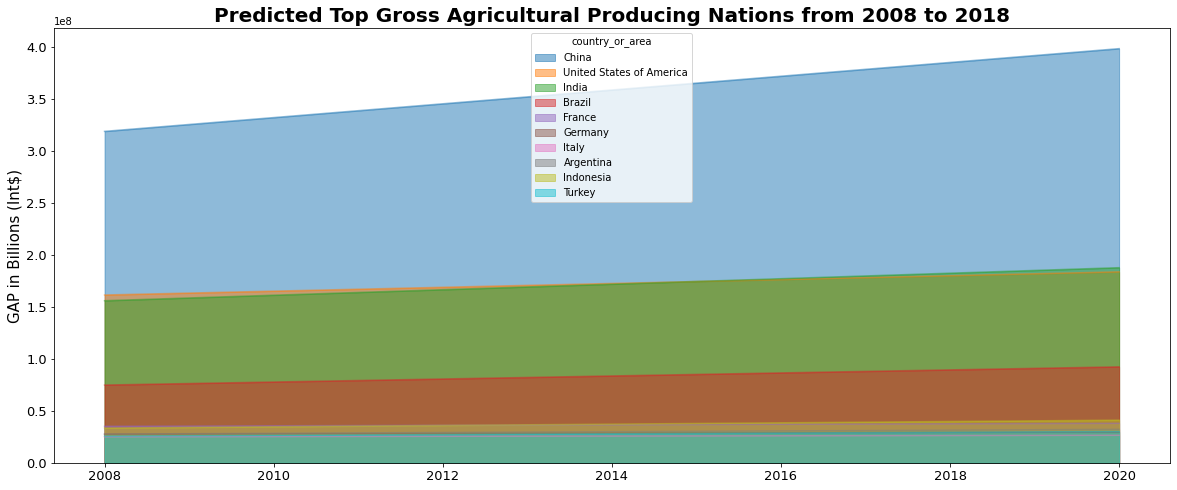

In [18]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Polynomial Regression

Training: [0.95232299568381, 0.956739753510508, 0.9567501360504458, 0.9567607307909197, 0.9567715422531944, 0.9567825746800802, 0.9567938320779996, 0.9568053182177298]
Test: [0.9487071552075663, 0.9485117102471909, 0.9485093278336999, 0.9485070820305677, 0.9485049035789356, 0.9485027910676276, 0.9485007425095396, 0.9484987555800031]
Degree:  2


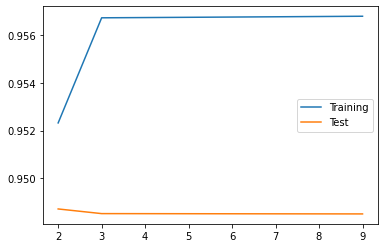

In [19]:
avg=[]
avg_t=[]
num=[]
for i in range(2,10):
    r_net=0
    r_net_t=0
    num.append(i)
    for col in cols:
        lm = LinearRegression()
        X=gap_top10[['year']]
        y=gap_top10[[col]]
        poly_reg=PolynomialFeatures(degree=i)
        poly_X=poly_reg.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.30, random_state=42)
        lm.fit(X_train, y_train)
        y_pred_t=lm.predict(X_train)
        r_net_t+=r2_score(y_train, y_pred_t)
        y_pred=lm.predict(X_test)
        r_net+=r2_score(y_test, y_pred)
        #print(r2_score(y_test, y_pred))
    #print('Average:', r_net/10)
    avg.append(r_net/10)
    avg_t.append(r_net_t/10)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()

a=max(avg)
index=avg.index(a)
poly_train = avg_t[index]
poly_test = a

print('Degree: ',index+2)

In [21]:
for col in cols:
    lm = LinearRegression()
    X = gap_top10[['year']]
    poly_reg=PolynomialFeatures(degree=index+2)
    poly_X=poly_reg.fit_transform(X)
    Y = gap_top10[[col]]
    lm.fit(poly_X, Y)
    pred1 = lm.predict(poly_reg.fit_transform(pred_indx))
    pred = pred1[0: 13]
    preds[col] = pred
preds

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
2008,3.803193e+08,1.631360e+08,1.700766e+08,8.573361e+07,3.213621e+07,2.440616e+07,2.248073e+07,3.060646e+07,3.690985e+07,2.523181e+07
2009,3.946416e+08,1.652050e+08,1.744950e+08,8.856006e+07,3.200028e+07,2.417746e+07,2.229710e+07,3.135506e+07,3.797998e+07,2.553693e+07
2010,4.092779e+08,1.672828e+08,1.789856e+08,9.144231e+07,3.184903e+07,2.393269e+07,2.210080e+07,3.211882e+07,3.906793e+07,2.583954e+07
2011,4.242281e+08,1.693693e+08,1.835485e+08,9.438034e+07,3.168246e+07,2.367183e+07,2.189181e+07,3.289774e+07,4.017369e+07,2.613964e+07
2012,4.394922e+08,1.714645e+08,1.881836e+08,9.737417e+07,3.150056e+07,2.339490e+07,2.167014e+07,3.369182e+07,4.129727e+07,2.643723e+07
2013,4.550702e+08,1.735686e+08,1.928910e+08,1.004238e+08,3.130334e+07,2.310189e+07,2.143579e+07,3.450106e+07,4.243866e+07,2.673231e+07
2014,4.709622e+08,1.756814e+08,1.976706e+08,1.035292e+08,3.109079e+07,2.279281e+07,2.118876e+07,3.532545e+07,4.359788e+07,2.702489e+07
2015,4.871680e+08,1.778029e+08,2.025225e+08,1.066904e+08,3.086293e+07,2.246764e+07,2.092905e+07,3.616501e+07,4.477491e+07,2.731495e+07
2016,5.036878e+08,1.799333e+08,2.074466e+08,1.099074e+08,3.061973e+07,2.212640e+07,2.065666e+07,3.701972e+07,4.596975e+07,2.760251e+07
2017,5.205215e+08,1.820724e+08,2.124430e+08,1.131802e+08,3.036122e+07,2.176908e+07,2.037159e+07,3.788959e+07,4.718242e+07,2.788756e+07


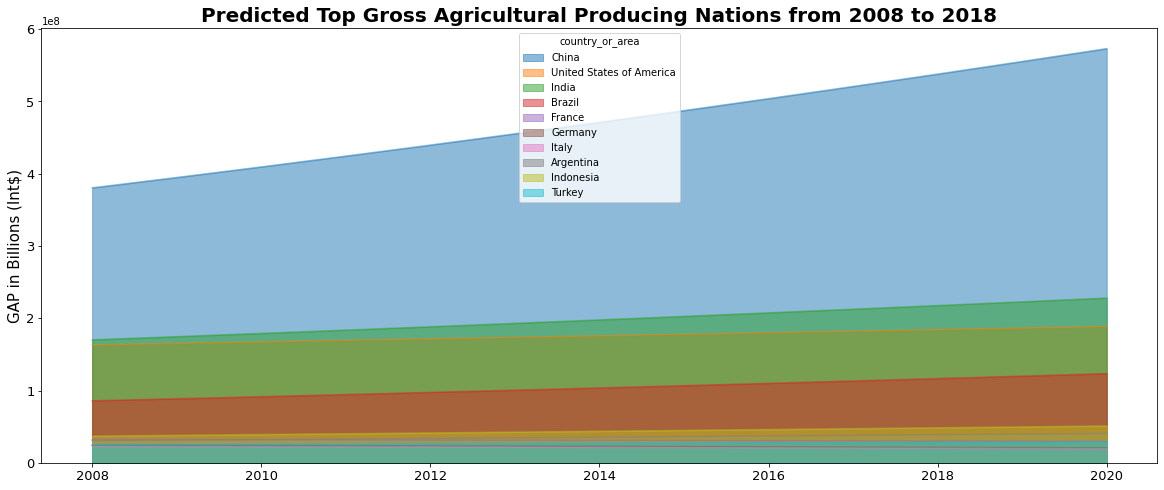

In [22]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Ridge Regression

In [23]:
total=0
for col in cols:
    ridge = Ridge()
    parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
    ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    ridge_regressor.fit(X,Y)
    print(ridge_regressor.best_params_)
    print(ridge_regressor.best_score_)
#print(total)

{'alpha': 20}
-2546932697559474.5
{'alpha': 1e-15}
-28519397711812.227
{'alpha': 20}
-142344278058058.0
{'alpha': 20}
-89320135332386.6
{'alpha': 20}
-7024021673456.342
{'alpha': 20}
-6765239347207.731
{'alpha': 20}
-4062017752517.0166
{'alpha': 20}
-7807287269925.831
{'alpha': 20}
-8341763533033.222
{'alpha': 20}
-726869861190.0759


In [24]:
r_net=0
r_net_t=0
for col in cols:
    X=gap_top10[['year']]
    y=gap_top10[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    ridge = Ridge(alpha=20)
    ridge.fit(X_train, y_train)
    y_pred_t=ridge.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=ridge.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred))
ridge_train=r_net_t/10
ridge_test= r_net/10
print('Training:',r_net_t/10)
print('Test:', r_net/10)

Training: 0.8635229261916155
Test: 0.880475792341835


In [25]:
for col in cols:
    ridge = Ridge()
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    ridge.fit(X,Y)
    pred1 = ridge.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
2008,3.187732e+08,1.614129e+08,1.559072e+08,7.479411e+07,3.513903e+07,2.755694e+07,2.496583e+07,2.763434e+07,3.341596e+07,2.572242e+07
2009,3.254038e+08,1.632669e+08,1.585550e+08,7.625346e+07,3.537851e+07,2.772213e+07,2.509287e+07,2.801151e+07,3.404950e+07,2.608894e+07
2010,3.320344e+08,1.651210e+08,1.612027e+08,7.771281e+07,3.561799e+07,2.788731e+07,2.521991e+07,2.838869e+07,3.468304e+07,2.645547e+07
2011,3.386650e+08,1.669750e+08,1.638505e+08,7.917216e+07,3.585747e+07,2.805250e+07,2.534695e+07,2.876586e+07,3.531658e+07,2.682200e+07
2012,3.452957e+08,1.688290e+08,1.664983e+08,8.063150e+07,3.609696e+07,2.821769e+07,2.547399e+07,2.914304e+07,3.595012e+07,2.718853e+07
2013,3.519263e+08,1.706830e+08,1.691461e+08,8.209085e+07,3.633644e+07,2.838288e+07,2.560104e+07,2.952021e+07,3.658366e+07,2.755505e+07
2014,3.585569e+08,1.725370e+08,1.717939e+08,8.355020e+07,3.657592e+07,2.854807e+07,2.572808e+07,2.989738e+07,3.721720e+07,2.792158e+07
2015,3.651875e+08,1.743910e+08,1.744417e+08,8.500955e+07,3.681540e+07,2.871325e+07,2.585512e+07,3.027456e+07,3.785073e+07,2.828811e+07
2016,3.718182e+08,1.762450e+08,1.770894e+08,8.646890e+07,3.705489e+07,2.887844e+07,2.598216e+07,3.065173e+07,3.848427e+07,2.865463e+07
2017,3.784488e+08,1.780990e+08,1.797372e+08,8.792825e+07,3.729437e+07,2.904363e+07,2.610920e+07,3.102891e+07,3.911781e+07,2.902116e+07


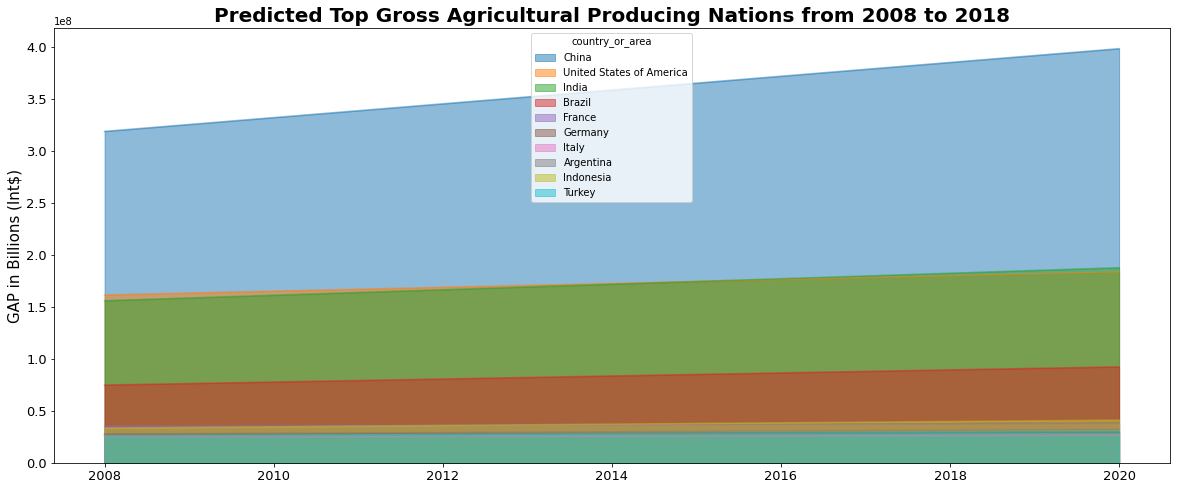

In [26]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Lasso Regression

In [27]:
for col in cols:
    lasso = Lasso()
    parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
    lasso_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    lasso_regressor.fit(X,Y)
    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_score_)

{'alpha': 20}
-2546932697559474.5
{'alpha': 1e-15}
-28519397711812.227
{'alpha': 20}
-142344278058058.0
{'alpha': 20}
-89320135332386.6
{'alpha': 20}
-7024021673456.342
{'alpha': 20}
-6765239347207.731
{'alpha': 20}
-4062017752517.0166
{'alpha': 20}
-7807287269925.831
{'alpha': 20}
-8341763533033.222
{'alpha': 20}
-726869861190.0759


In [28]:
r_net=0
r_net_t=0
for col in cols:
    X=gap_top10[['year']]
    y=gap_top10[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lasso = Lasso(max_iter=100000)
    lasso.fit(X_train, y_train)
    y_pred=lasso.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    y_pred_t=lasso.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    #print(r2_score(y_test, y_pred))
lasso_train= r_net_t/10
lasso_test=r_net/10
print('Train:', r_net_t/10)
print('Test:', r_net/10)

Train: 0.8635324827325889
Test: 0.8804776587476055


In [29]:
for col in cols:
    lasso = Lasso()
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    lasso.fit(X,Y)
    pred1 = lasso.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
2008,3.187916e+08,1.614181e+08,1.559145e+08,7.479816e+07,3.513969e+07,2.755740e+07,2.496618e+07,2.763538e+07,3.341772e+07,2.572343e+07
2009,3.254230e+08,1.632723e+08,1.585626e+08,7.625768e+07,3.537920e+07,2.772260e+07,2.509324e+07,2.801260e+07,3.405133e+07,2.609000e+07
2010,3.320543e+08,1.651265e+08,1.612107e+08,7.771719e+07,3.561871e+07,2.788781e+07,2.522029e+07,2.838982e+07,3.468495e+07,2.645657e+07
2011,3.386857e+08,1.669808e+08,1.638588e+08,7.917671e+07,3.585822e+07,2.805302e+07,2.534735e+07,2.876704e+07,3.531856e+07,2.682314e+07
2012,3.453171e+08,1.688350e+08,1.665069e+08,8.063623e+07,3.609773e+07,2.821823e+07,2.547441e+07,2.914426e+07,3.595217e+07,2.718971e+07
2013,3.519485e+08,1.706892e+08,1.691550e+08,8.209575e+07,3.633724e+07,2.838343e+07,2.560146e+07,2.952147e+07,3.658578e+07,2.755628e+07
2014,3.585799e+08,1.725434e+08,1.718031e+08,8.355526e+07,3.657675e+07,2.854864e+07,2.572852e+07,2.989869e+07,3.721939e+07,2.792285e+07
2015,3.652113e+08,1.743977e+08,1.744512e+08,8.501478e+07,3.681626e+07,2.871385e+07,2.585557e+07,3.027591e+07,3.785301e+07,2.828942e+07
2016,3.718427e+08,1.762519e+08,1.770992e+08,8.647430e+07,3.705577e+07,2.887905e+07,2.598263e+07,3.065313e+07,3.848662e+07,2.865599e+07
2017,3.784741e+08,1.781061e+08,1.797473e+08,8.793382e+07,3.729528e+07,2.904426e+07,2.610969e+07,3.103035e+07,3.912023e+07,2.902256e+07


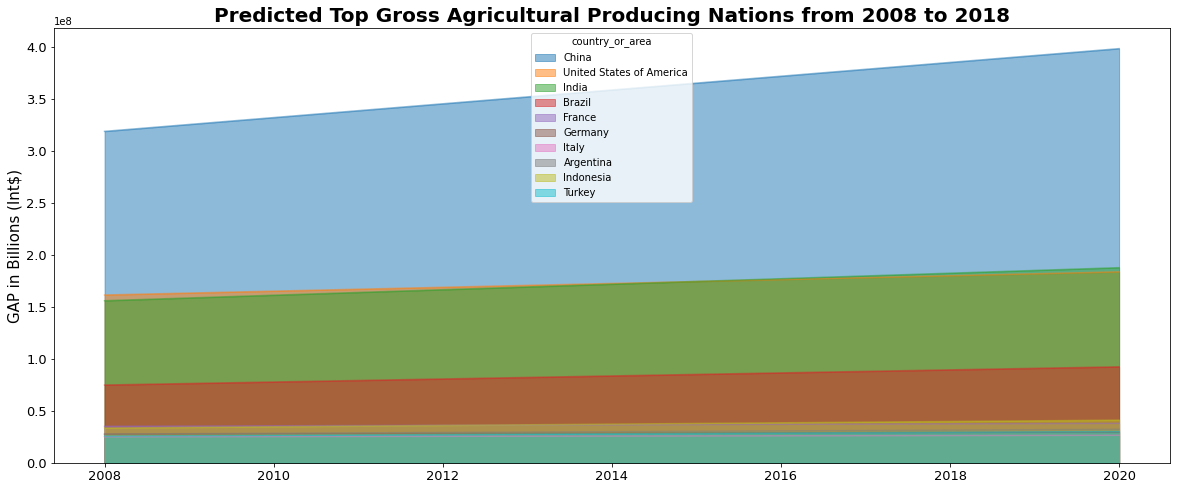

In [30]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# KNN

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

Training: [1.0, 0.9601290679768638, 0.9251834763927821, 0.8799586370902178, 0.8436315898877721, 0.7723347772975846, 0.7118834386505944]
Test: [0.9513073771636101, 0.9024136096330082, 0.8807976038873407, 0.8328083651826808, 0.7917440480963478, 0.7464785559983518, 0.6942463220709683]


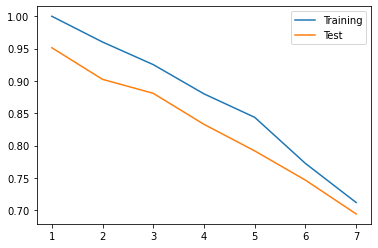

In [31]:
avg=[]
avg_t=[]
num=[]
for i in range(1,8):
    r_net=0
    r_net_t=0
    num.append(i)
    for col in cols:
        model = KNeighborsClassifier(n_neighbors=i)
        X=gap_top10[['year']]
        y=gap_top10[[col]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
        model.fit(X_train, y_train)
        y_pred_t=model.predict(X_train)
        r_net_t+=r2_score(y_train, y_pred_t)
        y_pred=model.predict(X_test)
        r_net+=r2_score(y_test, y_pred)
        #print(r2_score(y_test, y_pred))
    #print('Average:', r_net/10)
    avg_t.append(r_net_t/10)
    avg.append(r_net/10)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()
a=max(avg)
index=avg.index(a)
knn_train = avg_t[index]
knn_test = a


In [32]:
#KNN
for col in cols:
    model = KNeighborsClassifier(n_neighbors=index+1)
    X = gap_top10[['year']]
    Y = gap_top10[[col]]
    model.fit(X,Y)
    pred1 = model.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

country_or_area,China,United States of America,India,Brazil,France,Germany,Italy,Argentina,Indonesia,Turkey
2008,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2009,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2010,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2011,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2012,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2013,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2014,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2015,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2016,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0
2017,355131200.0,162395600.0,170453100.0,83339590.0,31048680.0,25273790.0,22599330.0,32030360.0,36964800.0,22955900.0


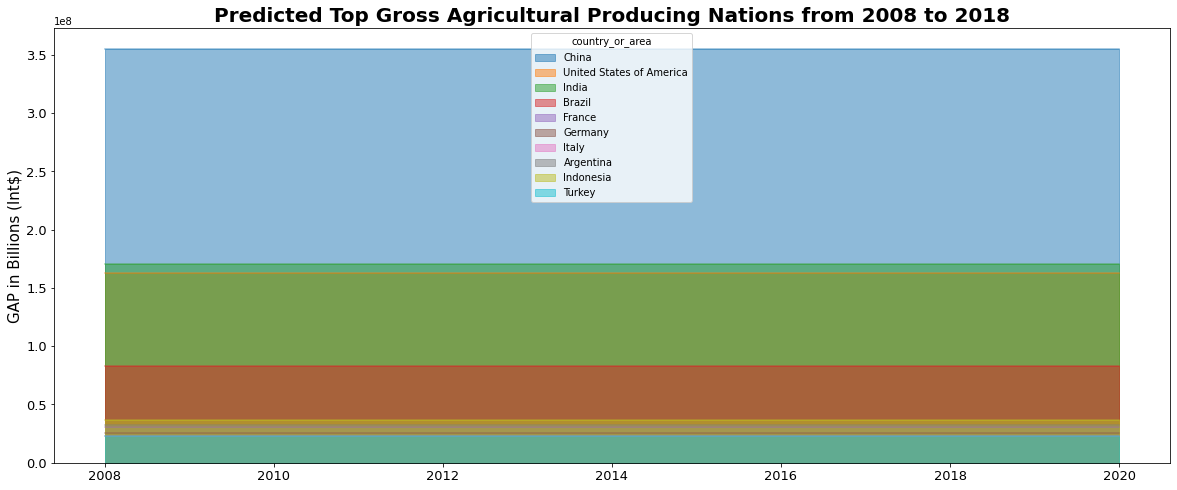

In [33]:
ax = preds.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Comparing

In [34]:
train_error=[linear_train,poly_train,ridge_train,lasso_train,knn_train]
test_error=[linear_test,poly_test,ridge_test,lasso_test,knn_test]

col={'Train score(r2)':train_error,'Test score(r2)':test_error}
models=['Linear Regression','Polynomial','Ridge Regression','Lasso Regression','KNN']
df=pd.DataFrame(data=col,index=models)
df

,Train score(r2),Test score(r2)
Linear Regression,0.863532,0.880478
Polynomial,0.952323,0.948707
Ridge Regression,0.863523,0.880476
Lasso Regression,0.863532,0.880478
KNN,1.000000,0.951307


(0.0, 1.0)

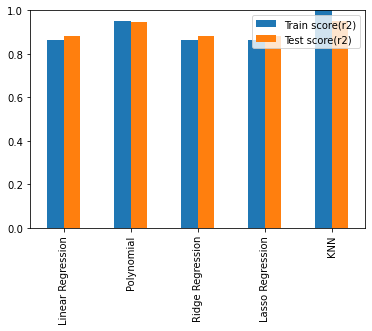

In [35]:
df.plot(kind='bar')
axes = plt.gca()
axes.set_ylim([0,1])